In [1]:
import os
import re
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import palantir as pl
import anndata as ad
from matplotlib.backends.backend_pdf import PdfPages

matplotlib.rcParams['font.family'] = ['serif']

In [2]:
def plot_gene_expr(expr, vis, dim1, dim2, genes, file, n_cols, s=3, 
                   newGeneName=None):
    cmap = matplotlib.cm.Spectral_r
    fig = pl.plot.FigureGrid(len(genes), n_cols)
    for g, ax in zip(genes, fig):
        c = expr.loc[vis.index, g]
        ax.scatter(vis.loc[:, dim1], vis.loc[:, dim2], s=s, c=c, cmap=cmap)
        ax.set_axis_off()
        if newGeneName and g in newGeneName:
            figTitle = newGeneName[g]
        else:
            figTitle = g
        ax.set_title(figTitle)
        normalize = matplotlib.colors.Normalize(vmin=np.min(c), vmax=np.max(c))
        cax, _ = matplotlib.colorbar.make_axes(ax)
        cb = matplotlib.colorbar.ColorbarBase(cax, norm=normalize, cmap=cmap)
        #cb.ax.set_title('Expression')
        cb.set_label('Expression')
    n_rows = math.ceil(len(genes) / n_cols)
    fig.figure.set_size_inches(7 * n_cols, 5 * n_rows)
    file.savefig(fig.figure, bbox_inches='tight')
    return 0

def plot_gene_expr_grayout(expr, vis, vis2, dim1, dim2, genes, file, n_cols, figTitle, s=3, 
                   newGeneName=None):
    cmap = matplotlib.cm.Spectral_r
    fig = pl.plot.FigureGrid(len(genes), n_cols)
    for g, ax in zip(genes, fig):
        c = expr.loc[vis.index, g]
        ax.scatter(vis2.loc[:, dim1], vis2.loc[:, dim2], s=s, c='#dedede')
        ax.scatter(vis.loc[:, dim1], vis.loc[:, dim2], s=s, c=c, cmap=cmap)
        ax.set_axis_off()
        if newGeneName and g in newGeneName:
            figTitle = newGeneName[g]
        else:
            figTitle = g
        ax.set_title(figTitle)
        normalize = matplotlib.colors.Normalize(vmin=np.min(c), vmax=np.max(c))
        cax, _ = matplotlib.colorbar.make_axes(ax)
        matplotlib.colorbar.ColorbarBase(cax, norm=normalize, cmap=cmap)
    n_rows = math.ceil(len(genes) / n_cols)
    fig.figure.set_size_inches(7 * n_cols, 5 * n_rows)
    file.savefig(fig.figure, bbox_inches='tight')
    return 0

# Load data

In [3]:
pref = 'integrate-ILC3-TC-v5/cca'

md = pd.read_csv(os.path.join(pref, 'meta-data.csv'), header=0, index_col=0)
umap = pd.read_csv(os.path.join(pref, 'UMAP.csv'), header=0, index_col=0)
adata = ad.read_h5ad(os.path.join(pref, 'unimputed-expr.h5ad'))

unimp_df = pd.DataFrame(adata.X.toarray(), index=adata.obs_names, columns = adata.var_names)
genes = unimp_df.columns

## Expr overlay

In [5]:
plotDir = os.path.join('plots', pref, 'gene-expr')
os.makedirs(plotDir, exist_ok = True)

In [6]:
geneLists = [["AIRE", 'RORC', 'H2-AB1', 'CXCR6', 'PRDM16', 'NCAM1', "ITGB8"]]

In [7]:
for gene_list in geneLists:
    for gene in gene_list:
        if gene.upper() not in genes:
            print(gene)

In [8]:
# unimputed
ci = md.index
cellgroup = 'all'
ncols = 3
titles = ['Rorc_etc']

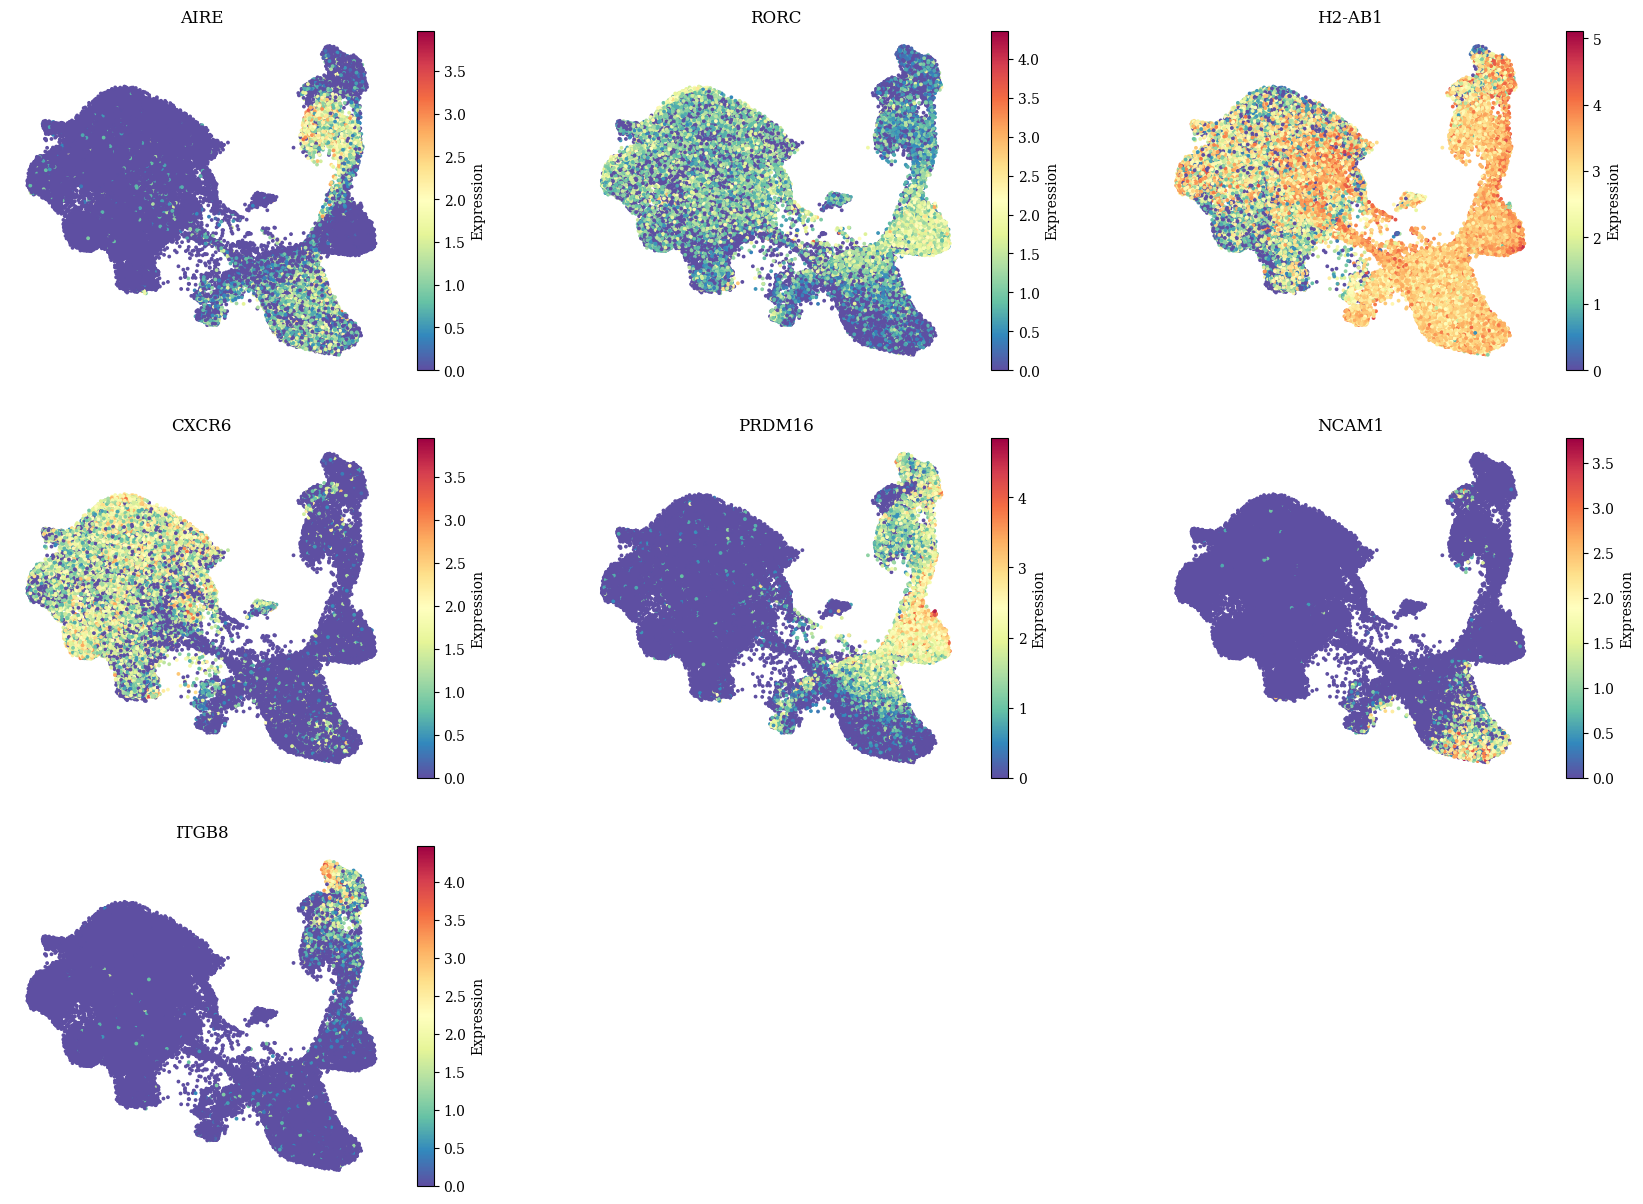

In [9]:
for geneList, title in zip(geneLists, titles):
    ncols = 3 if len(geneList) > 2 else len(geneList)
    file = PdfPages(os.path.join(plotDir, 'UMAP-{}-unimputed-{}.pdf'.format(cellgroup, title)))
    plot_gene_expr(expr=unimp_df.loc[ci, :], vis=umap.loc[ci, :], dim1='UMAP_1', dim2='UMAP_2', genes=geneList,
               file=file, n_cols=ncols)
    file.close()